#TALLER PYTHON TERCER CORTE
Laura Valentina Duarte - 63201107
David Santiago Pedraza - 63201120



In [81]:
pip install wooldridge

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [121]:
import pandas as pd
import numpy as np
import wooldridge as wd
import matplotlib.pyplot as plt
import scipy.stats as st

In [122]:
wage = wd.data('wage1')[['wage','educ']]
y = wage['wage']
x = wage['educ']

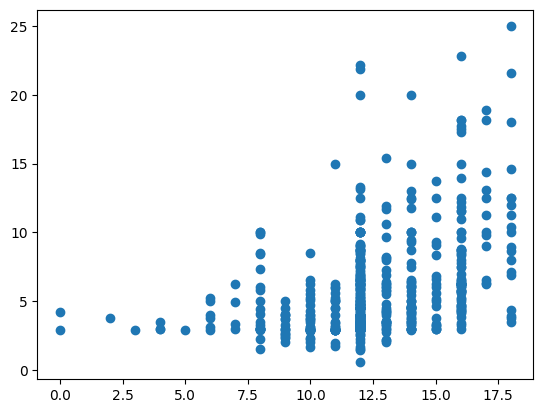

In [123]:
plt.scatter(x,y)

IDENTIFICACIÓN MÉTODO WHITE

In [124]:
x = np.c_[np.ones(len(x)),x]

In [126]:
betas = np.linalg.inv(x.T.dot(x)).dot(x.T.dot(y))

In [129]:
y_est = x.dot(betas)
y_est_2 = y_est ** 2
u_est = y - x.dot(betas)
u_est_2 = u_est ** 2

In [130]:
x_u = np.c_[np.ones(len(y_est)), y_est, y_est_2]

In [132]:
betas_u = np.linalg.inv(x_u.T.dot(x_u)).dot(x_u.T.dot(u_est_2))

In [133]:
u_est_2_est = x_u.dot(betas_u)
sst = sum((u_est_2 - u_est_2.mean()) ** 2)
sse = sum((u_est_2_est - u_est_2.mean()) ** 2)
r2 = sse / sst

In [134]:
r2

0.044183563582538124

In [137]:
chi_stat = len(x_u) * r2

In [138]:
chi_stat

23.240554444415054

In [139]:
chi = st.chi2(2)
p_valor = 1 - chi.cdf(chi_stat)

In [140]:
p_valor

8.982096656673377e-06

El resultado del P_Valor da seis ceros izquierda lo que sgnifica que **SI** es heterocedastico en el modelo.